# Performance

## Texas state salaries

About 700,000 records. We'll use time to measure execution time. In the pydata video we used %timeit which takes the average of several runs. For this version to be displayed properly in github, I used %time.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from stemgraphic import stem_graphic

In [2]:
texas = pd.read_csv('salaries.csv')

In [3]:
texas.describe(include='all')

,Employee ID,Name,Title,Department,Gender,Hire_date,Annual_salary,Entity,Entity_Type
count,6.901430e+05,690143,689784,690116,690143,690138,6.901420e+05,690143,690143
unique,NaN,632927,47134,14618,7,13528,NaN,144,11
top,NaN,Maria Rodriguez,Teacher,Texas Department of Criminal Justice,F,09/01/2004,NaN,State of Texas,School District
freq,NaN,75,30647,38543,394985,13812,NaN,148960,204131
mean,1.007210e+06,NaN,NaN,NaN,NaN,NaN,4.650317e+04,NaN,NaN
std,4.187136e+05,NaN,NaN,NaN,NaN,NaN,3.286798e+04,NaN,NaN
min,1.557530e+05,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,7.556675e+05,NaN,NaN,NaN,NaN,NaN,2.953296e+04,NaN,NaN
50%,1.049316e+06,NaN,NaN,NaN,NaN,NaN,4.322486e+04,NaN,NaN
75%,1.387990e+06,NaN,NaN,NaN,NaN,NaN,5.576480e+04,NaN,NaN


# Pandas histogram

The built in histogram doesn't give us as much detail as we would like to...

CPU times: user 44 ms, sys: 8 ms, total: 52 ms
Wall time: 55.9 ms


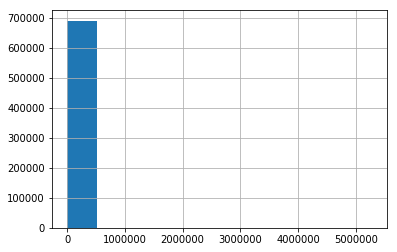

In [4]:
%time ax = texas.Annual_salary.hist()

Let's try with seaborn's distplot.

ValueError: cannot convert float NaN to integer

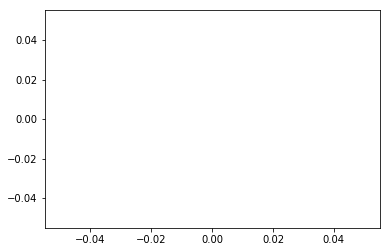

In [5]:
%time g = sns.distplot(texas.Annual_salary)

Ah yes. We have to do some data munging before we can use it, removing the NaN (not a number or null) values. That should also be taken into consideration when talking about performance, if you have to do extra steps.

CPU times: user 248 ms, sys: 12 ms, total: 260 ms
Wall time: 261 ms


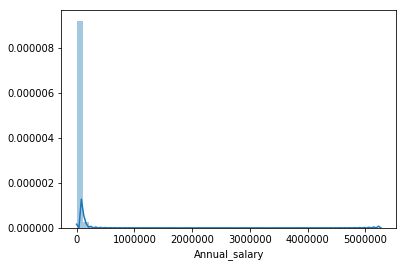

In [6]:
%time g = sns.distplot(texas.Annual_salary.dropna())

A little slower, nicer looking, but, again, not as informative as we'd like. Let's see how stem_graphic does.

CPU times: user 100 ms, sys: 4 ms, total: 104 ms
Wall time: 97.8 ms


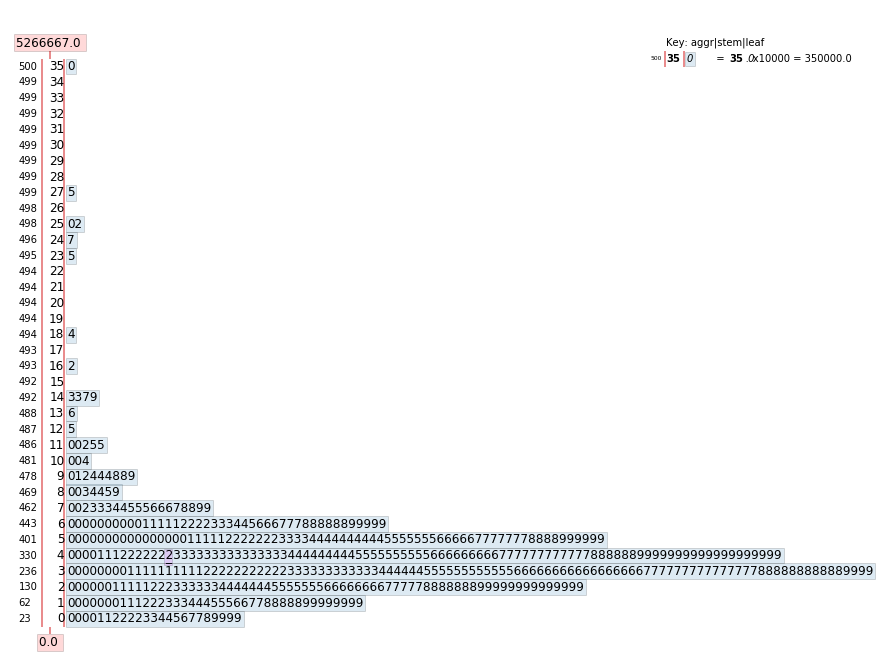

In [7]:
%time fig, ax = stem_graphic(texas.Annual_salary, display=500, random_state=1235)

We can see a lot of detail. The extremes ARE extreme ($5.2M). I can also see the trend for non managerial, managerial, upper management and beyond (350K). And I can look at this for much large sets of data.

## Make excel cry

12.5M rows, NYC yellow taxi trips data on a laptop (ran also on a full year and multi years using a dask cluster with hdfs storage - given enough nodes, you can have sub second response time).



In [8]:
!head yellow_tripdata_2015-01.csv

In [9]:
%time !wc yellow_tripdata_2015-01.csv

  12748987   38246959 1985964692 yellow_tripdata_2015-01.csv
CPU times: user 308 ms, sys: 28 ms, total: 336 ms
Wall time: 16.5 s


In [10]:
%time df1 = pd.read_csv('yellow_tripdata_2015-01.csv')

CPU times: user 27.2 s, sys: 1.78 s, total: 29 s
Wall time: 28.9 s


From the above results, we  see that the C written optimized word count (_wc_) application took close to 17 seconds to count words in the file. _wc_ is used as a reference low watermark. It is expected to be faster than anything in Python loading that same document.

And sure enough, pandas took longer at around 29 seconds to load.

In [11]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


CPU times: user 1.48 s, sys: 0 ns, total: 1.48 s
Wall time: 1.47 s


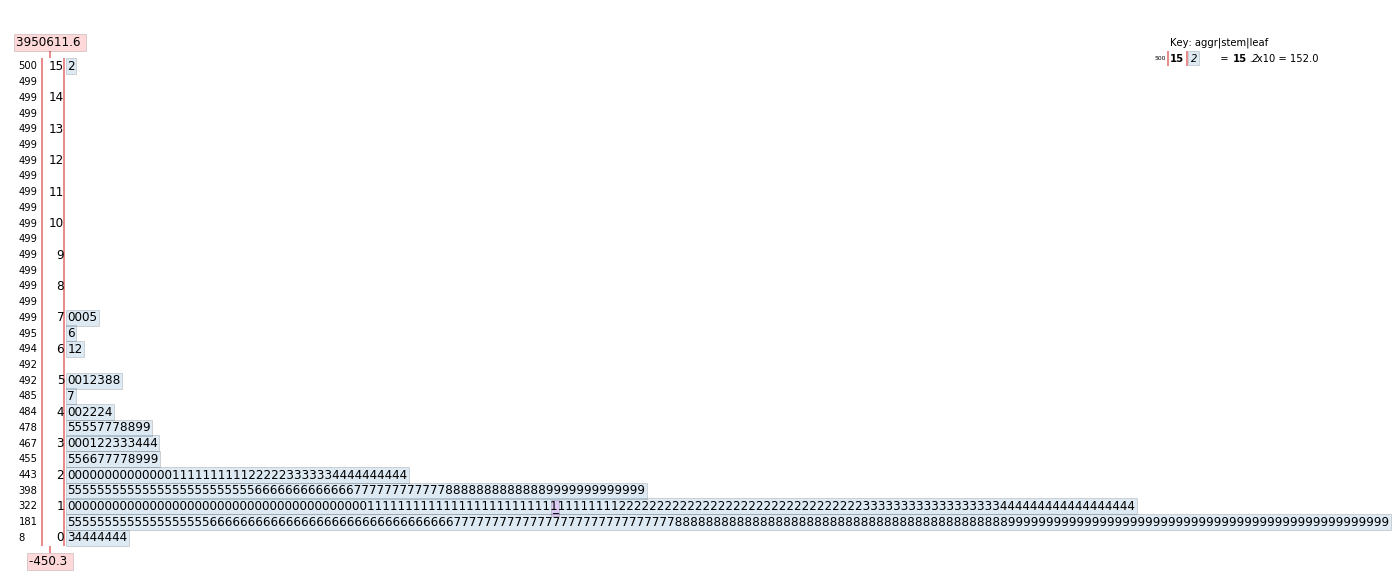

In [12]:
%%time
fig, ax = stem_graphic(df1.total_amount, display=500);

loading the data (29s) and displaying it (less than 1.5s) took a little over 30 seconds. Less than 31s at any rate is quite acceptable for 12 million rows.

But we can do slightly better with dask (although, this scenario with a single local file and a laptop with only 4 core and limited memory and IO bandwidth doesn't fully demonstrate the real power of dask compared to a server or cluster and/or multiple files)

In [13]:
# you need to have the dask module installed to run this part
import dask.multiprocessing
dask.set_options(get=dask.multiprocessing.get)

import dask.dataframe as dd

CPU times: user 1.4 s, sys: 1.62 s, total: 3.02 s
Wall time: 24.4 s


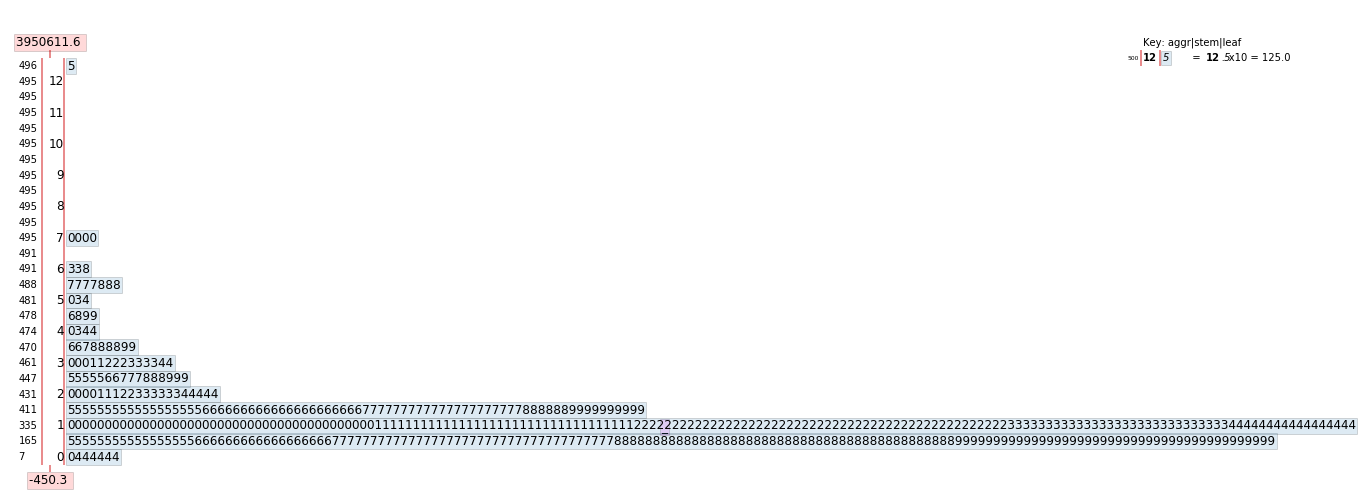

In [14]:
%%time
df = dd.read_csv('yellow_tripdata_2015-01.csv')
stem_graphic(df.total_amount, display=500)